In [1]:
from torch import nn, optim, manual_seed, flatten
from Util import apply_conv, apply_pool
import matplotlib.pyplot as plt
from Dataset_Loader import load_leafs_dataset
from Training import train_cnn
from Model_Evaluation import evaluate_model_with_outputs

In [2]:
class CNN(nn.Module):
    def __init__(self,dropout_rate):
        super().__init__()
        width = 1633
        height = 1089
        self.pool1, width, height = apply_pool(width, height, kernel_size=2, stride=2)
        self.pool2, width, height = apply_pool(width, height, kernel_size=2, stride=2)
        self.pool3, width, height = apply_pool(width, height, kernel_size=2, stride=2)
    
        self.conv1, width, height = apply_conv(width, height, 1, 8, kernel_size=3, stride=1, padding=1)
        self.pool4, width, height = apply_pool(width, height, kernel_size=2, stride=2)

        self.conv2, width, height = apply_conv(width, height, 8, 16, kernel_size=3, stride=1, padding=1)
        self.pool5, width, height = apply_pool(width, height, kernel_size=2, stride=2)

        self.fc1 = nn.Linear(16*width*height, 1000)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(1000, 99)

    def forward(self, x):
        x = self.pool1(x)
        x = self.pool2(x)
        x = self.pool3(x)

        x = nn.functional.relu(self.conv1(x))
        x = self.pool4(x)

        x = nn.functional.relu(self.conv2(x))
        x = self.pool5(x)

        x = flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = nn.functional.log_softmax(self.fc2(x), dim=1)
        return x

Reading CSV: 0.028 seconds
Encoding Labels: 0.001 seconds
Resizing Images: 2.429 seconds
Splitting Data: 0.291 seconds
Converting To Tensor: 1.675 seconds
Dividing To Batches: 0.002 seconds
Epoch: 0 / loss: 3.1902873516082764
Epoch: 1 / loss: 1.6372205018997192
Epoch: 2 / loss: 0.5395779609680176
Epoch: 3 / loss: 0.08266391605138779
Epoch: 4 / loss: 0.06984536349773407
Epoch: 5 / loss: 0.47887396812438965
Epoch: 6 / loss: 0.007049764506518841
Epoch: 7 / loss: 0.006915170233696699
Epoch: 8 / loss: 0.00304285972379148
Epoch: 9 / loss: 0.0023783957585692406
Epoch: 0 / loss: 1.7880710363388062
Epoch: 1 / loss: 1.7931379079818726
Epoch: 2 / loss: 0.84279865026474
Epoch: 3 / loss: 0.13340406119823456
Epoch: 4 / loss: 0.09047058969736099
Epoch: 5 / loss: 0.09019985049962997
Epoch: 6 / loss: 0.011278802528977394
Epoch: 7 / loss: 0.01176527515053749
Epoch: 8 / loss: 0.005690361373126507
Epoch: 9 / loss: 0.003365472424775362
Epoch: 0 / loss: 3.2601051330566406
Epoch: 1 / loss: 1.8936426639556885

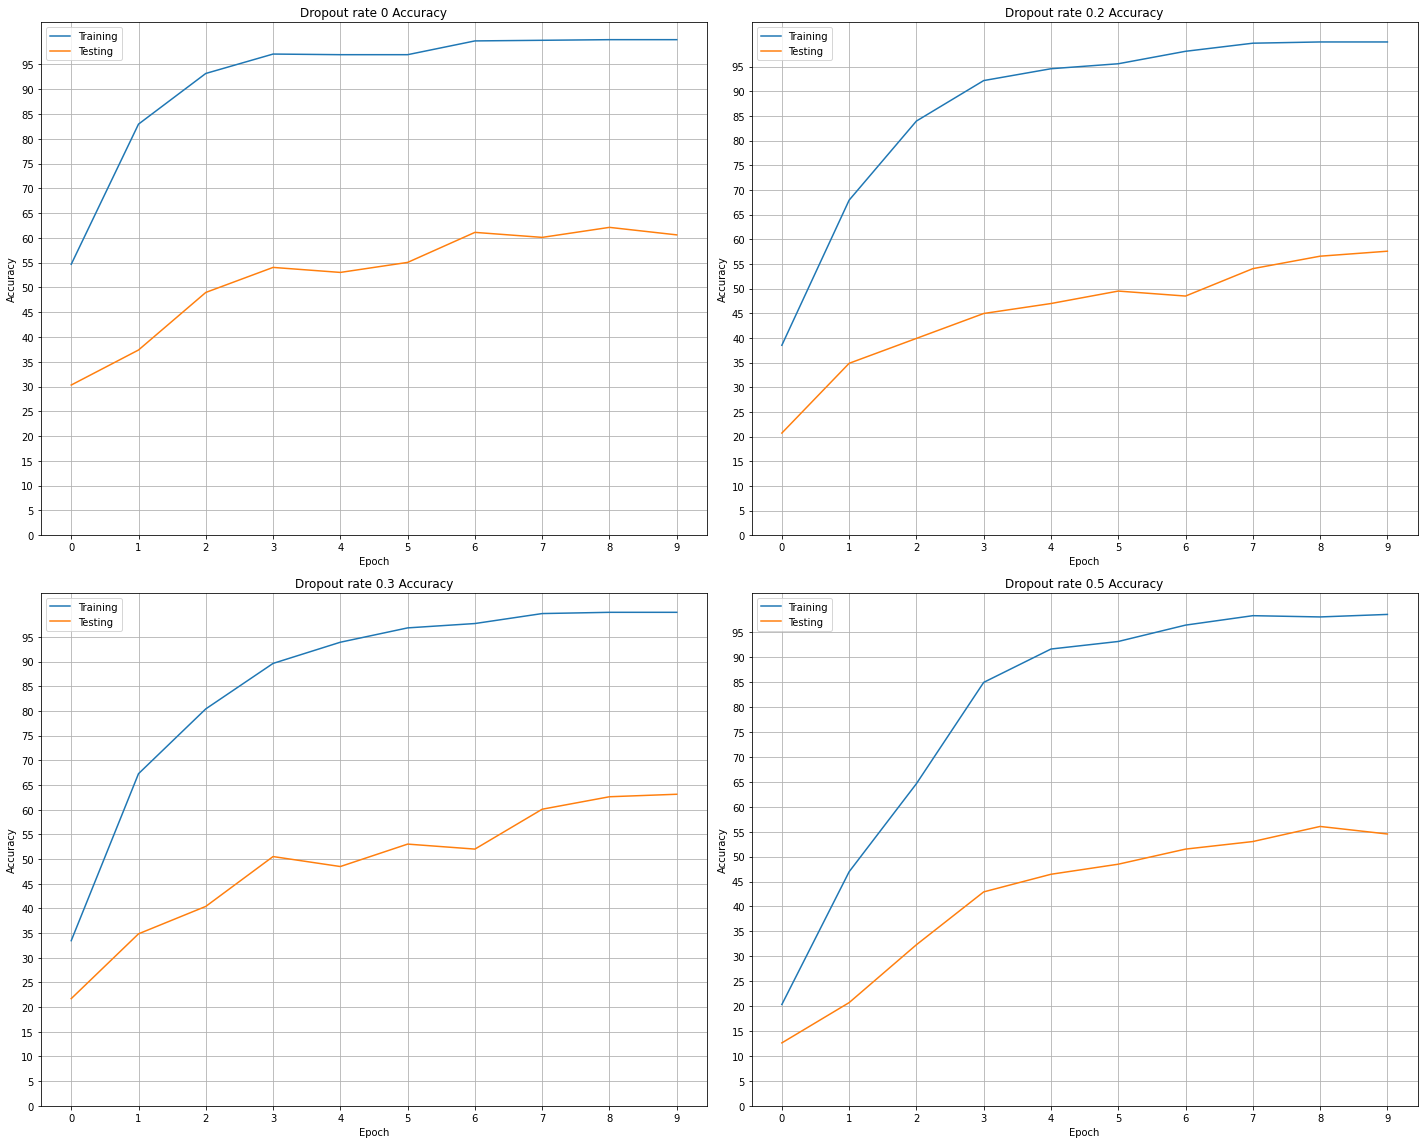

<Figure size 432x288 with 0 Axes>

In [3]:
test_split_size = 0.2
batch_size = 8
epochs = 10
images_train, images_test, labels_train, labels_test = load_leafs_dataset(test_split_size,batch_size)
fig = plt.figure(figsize=(20, 16))
for i,dropout_rate in enumerate([0,0.2,0.3,0.5]):
    manual_seed(1)
    model = CNN(dropout_rate = dropout_rate)
    trained_model, losses_train, accuracies_train, accuracies_test = train_cnn(model= model,
              images_train= images_train,
              labels_train= labels_train,
              images_test= images_test,
              labels_test= labels_test,
              epochs= epochs,
              batch_size= batch_size,
              lossFunction=nn.CrossEntropyLoss(),
              optimizer=optim.Adam(model.parameters(),0.0001),
              calc_accuracy=True,
              print_loss = True
             )
    ax = fig.add_subplot(221 + i)
    ax.set_title(f"Dropout rate {dropout_rate} Accuracy")
    rng_x = range(epochs)
    rng_y = range(0, 100, 5)
    plt.tight_layout()
    plt.plot(rng_x, accuracies_train, label='Training')
    plt.plot(rng_x, accuracies_test, label='Testing')
    plt.xlabel('Epoch')
    plt.xticks(rng_x, rng_x)
    plt.ylabel('Accuracy')
    plt.yticks(rng_y, rng_y)
    plt.grid()
    plt.legend()
       
plt.show()
plt.savefig('dropout.png')